In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [14]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000
print(train_data.dtype) # int
print(train_data.max()) # 0~255

(60000, 28, 28)
(10000, 28, 28)
uint8
255


#### Normalization

In [15]:
train_data = train_data.reshape(60000, 784).astype('float32') / 255.0 # 0~255 -> 0~1
test_data = test_data.reshape(10000, 784).astype('float32') / 255.0 # 0~255 -> 0~1

#### One-hot encoding

In [16]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [17]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
#**나중에 가장 많이 손 댈 부분이 dense
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [18]:
optimizers.Adam()
# shift + tab
#lr default가 0.001임을 확인

In [19]:
model.compile(optimizer=optimizers.Adam(0.01), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

<br> 

#### 3. Train the model

In [20]:
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2)
#history에 담고 있음
#validation: 좀 더 객관적으로 작동되게끔
#fitting하는 과정을 history에 저장함

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 134us/sample - loss: 0.2432 - categorical_accuracy: 0.9258 - val_loss: 0.1187 - val_categorical_accuracy: 0.9661
Epoch 2/15
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1326 - categorical_accuracy: 0.9600 - val_loss: 0.0929 - val_categorical_accuracy: 0.9712
Epoch 3/15
48000/48000 [==============================] - 5s 104us/sample - loss: 0.1030 - categorical_accuracy: 0.9684 - val_loss: 0.0990 - val_categorical_accuracy: 0.9714
Epoch 4/15
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0903 - categorical_accuracy: 0.9715 - val_loss: 0.0870 - val_categorical_accuracy: 0.9750
Epoch 5/15
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0774 - categorical_accuracy: 0.9756 - val_loss: 0.0862 - val_categorical_accuracy: 0.9758
Epoch 6/15
48000/48000 [==============================] - 6s 129us/sample - loss

<br> 

#### 4. Test the model

In [21]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0691 - categorical_accuracy: 0.9810
loss (cross-entropy) : 0.069138893401514
test accuracy : 0.981


<br> 

#### 5. Visualize the result

In [22]:
history.history.keys()
# loss랑 matirx가 매번 계산되면서 history에 저장<<불러낼 수 있는 형태로

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

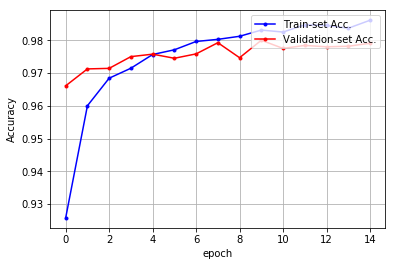

In [23]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()